# Logistic Regression Modeling
* Notebook completed by Adam Lang
* Date: 4/15/2024 This notebook will go over Logistic Regression Modeling.
* This was completed as part of the Springboard Data Science Fellowship and LinkedIn Learning course "Python Statistics Essential Training."

In [1]:
## imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# stats models api
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fix error in some versions of statsmodels
import scipy
if not hasattr(scipy.stats, 'chisqprob'):
  scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

In [2]:
## import smoking dataset
smoking = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/whickham.csv')

In [3]:
# subset data
smoking = smoking[smoking.age < 65]

In [5]:
# function to plot data
color = np.where(smoking.smoker == 'No','skyblue','coral')
jitter = 0.05*(np.random.rand(len(smoking)) - 0.5)
def plotfit(fit):
    plt.scatter(smoking.age,smoking.outcome + jitter,c=color,linewidth=0.2,edgecolor='k',alpha=0.5)
    plt.scatter(smoking.age,fit.predict(smoking),c=color,linewidth=0.2,edgecolor='gray',marker='d')


## OLS (Ordinary Least Squares)

In [6]:
# create a filter
smoking['outcome'] = 1*(smoking['outcome'] == 'Alive')

In [7]:
## build an OLS model
ols_group_age = smf.ols('outcome ~ smoker + age', data=smoking).fit()

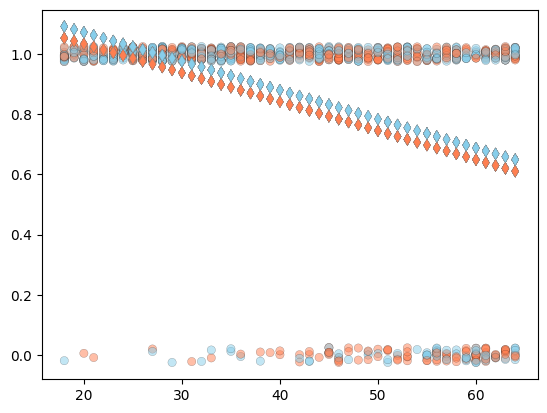

In [8]:
# plot
plotfit(ols_group_age)

Plot Summary:
* Orange is smokers
* Blue is non-smokers
* There is an association between smoking and negative outcomes.

In [9]:
# params
ols_group_age.params

Intercept        1.264665
smoker[T.Yes]   -0.038738
age             -0.009615
dtype: float64

In [10]:
# print anova table
sm.stats.anova_lm(ols_group_age)

,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,0.899981,0.899981,8.181417,4.314608e-03
age,1.0,17.713821,17.713821,161.030213,1.806638e-34
Residual,1068.0,117.483303,0.110003,NaN,NaN


In [11]:
# confidence interval
ols_group_age.conf_int()

,0,1
Intercept,1.198828,1.330503
smoker[T.Yes],-0.078622,0.001146
age,-0.011102,-0.008129


We can better understand this by performing Logistic Regression

# Logistic Regression Model

In [12]:
# build logistic model
logit_smoker_age = smf.logit('outcome ~ smoker + age', data=smoking).fit()

Optimization terminated successfully.
         Current function value: 0.346766
         Iterations 7


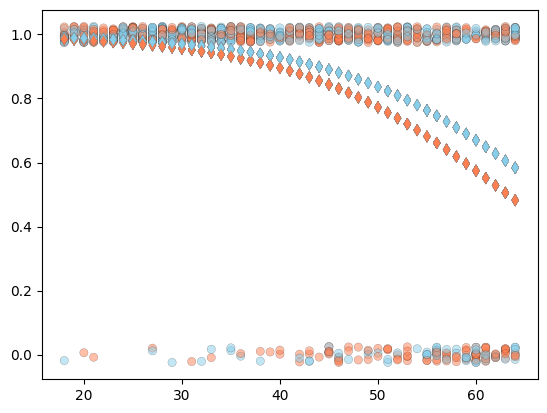

In [13]:
# plot
plotfit(logit_smoker_age)

Result: Now with Logistic Regression model the results are bounded between 0 and 1.

## Goodness of fit in Logistic Regression
* We can't use the MSE here so we use the maximum likelihood estimation.
* The likelihood function is the probability that the observed values of the dependent variable may be predicted from the observed values of the independent variables. The likelihood varies from 0 to 1.
* The MLE is the value that maximizes the probability of the observed data. And is an example of a point estimate because it gives a single value for the unknown parameter.
* Source: https://arunaddagatla.medium.com/maximum-likelihood-estimation-in-logistic-regression-f86ff1627b67

In [14]:
# maximum likelihood estimation
logit_smoker_age.llf


-371.38650786619064

In [15]:
logit_smoker_age.params

Intercept        6.250847
smoker[T.Yes]   -0.408103
age             -0.092403
dtype: float64

We can say that smoking reduces the probability of being alive but not uniformly.

In [16]:
# conf int
logit_smoker_age.conf_int()

,0,1
Intercept,5.331126,7.170568
smoker[T.Yes],-0.777754,-0.038451
age,-0.109478,-0.075327


Confidence intervals show the association with smoking is weak at best.

In [18]:
# summary
logit_smoker_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 1071
Model:                          Logit   Df Residuals:                     1068
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                  0.1776
Time:                        19:10:10   Log-Likelihood:                -371.39
converged:                       True   LL-Null:                       -451.59
Covariance Type:            nonrobust   LLR p-value:                 1.469e-35
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.2508      0.469     13.321      0.000       5.331       7.171
smoker[T.Yes]    -0.4081      0.189     -2.164      0.030      -0.778      -0.038
age              -0.0924      0.009    -10.606      0.000      -0.109      -0.075
=================================================================================
"""